<h1>Weather Identification Model</h1>

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
base_dir = '/content/drive/My Drive/Photos/dataset'
!ls "/content/drive/My Drive/Photos/dataset"

training


In [ ]:
testing_dir = os.path.join(base_dir, 'testing')
train_dir = os.path.join(base_dir, 'training')

In [ ]:
dew_dir = os.path.join(train_dir, 'dew')
fogsmog_dir = os.path.join(train_dir, 'fogsmog')
frost_dir = os.path.join(train_dir, 'frost')
glaze_dir = os.path.join(train_dir, 'glaze')
hail_dir = os.path.join(train_dir, 'hail')
lightning_dir = os.path.join(train_dir, 'lightning')
rain_dir = os.path.join(train_dir, 'rain')
rainbow_dir = os.path.join(train_dir, 'rainbow')
rime_dir = os.path.join(train_dir, 'rime')
sandstorm_dir = os.path.join(train_dir, 'sandstorm')
snow_dir = os.path.join(train_dir, 'snow')

print("Jumlah Data Train Tiap Kelas")
print("Jumlah Gambar Dew :", len(os.listdir(dew_dir)))
print("Jumlah Gambar Fogsmog :", len(os.listdir(fogsmog_dir)))
print("Jumlah Gambar Frost :", len(os.listdir(frost_dir)))
print("Jumlah Gambar Glaze :", len(os.listdir(glaze_dir)))
print("Jumlah Gambar Hail :", len(os.listdir(hail_dir)))
print("Jumlah Gambar Lightning :", len(os.listdir(lightning_dir)))
print("Jumlah Gambar Rain :", len(os.listdir(rain_dir)))
print("Jumlah Gambar Rainbow :", len(os.listdir(rainbow_dir)))
print("Jumlah Gambar Rime :", len(os.listdir(rime_dir)))
print("Jumlah Gambar Sandstorm :", len(os.listdir(sandstorm_dir)))
print("Jumlah Gambar Snow :", len(os.listdir(snow_dir)))

Jumlah Data Train Tiap Kelas
Jumlah Gambar Dew : 695
Jumlah Gambar Fogsmog : 851
Jumlah Gambar Frost : 475
Jumlah Gambar Glaze : 639
Jumlah Gambar Hail : 591
Jumlah Gambar Lightning : 377
Jumlah Gambar Rain : 526
Jumlah Gambar Rainbow : 232
Jumlah Gambar Rime : 1160
Jumlah Gambar Sandstorm : 692
Jumlah Gambar Snow : 621


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

Found 6859 images belonging to 11 classes.
Found 6859 images belonging to 11 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print('\nAkurasi mencapai 99%')
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(11, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=9,
    epochs=5,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.2072 - loss: 2.3074 - val_accuracy: 0.1000 - val_loss: 2.3866
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.2506 - loss: 2.1722 - val_accuracy: 0.2000 - val_loss: 2.1239
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.1635 - loss: 2.3044 - val_accuracy: 0.2000 - val_loss: 2.2361
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.2363 - loss: 2.1268 - val_accuracy: 0.2000 - val_loss: 2.1929
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.2778 - loss: 2.0649 - val_accuracy: 0.3000 - val_loss: 2.0617


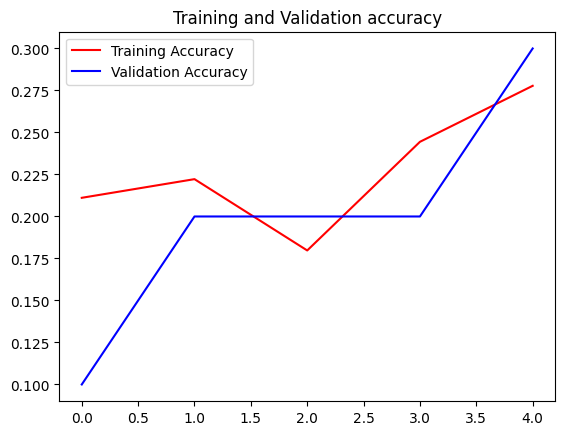

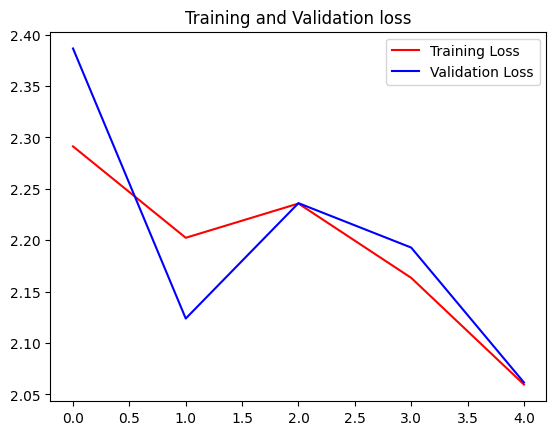

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc='best')
plt.show()

Saving images.jpeg to images.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
images.jpeg
This image belongs to class snow


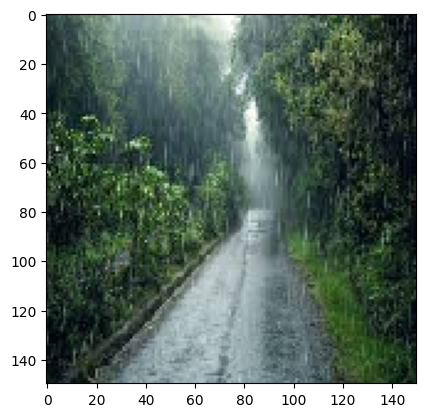

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
      if classes[0][j] == 1.:
          print('This image belongs to class', class_list[j - 1])
          break